# Practica de Remuestreo

### Estudiante: Nicolò Trevisani

Daniel García Diaz (garciad@ifca.unican.es)

Las tecnicas de remuestreo son tecnicas desarrolladas hace pocos años para calcular valores estadisticos, basandose en tecnicas computacionales intensivas que evitan los calculos complejos de la teoria estadistica tradicional.

Serie temporal de datos fisico-quimicos medidos en el embalse de Cuerda del Pozo (Soria) en los años 2014 y 2015.

File -> CdP_practica_estadistica.csv

In [4]:
#Establecemos el directorio para poder leer los datos correctamente
rm(list=ls())
#setwd()
file = "CdP_practica_estadistica.csv"

Carga el dataset con R y selecciona la temperatura de ambos años por separado. Selecciona solo los datos de Temperatura para el Verano (Julio, Agosto y Septiembre). 

NOTA!! -> Formatea la fecha para poder dividir los datos en años.

Calula la media, mediana y desviacion media de cada uno de los años por separado, devuelve una tabla con los datos

In [36]:
# Leo el dataset y quito los valores 'na'
my.data <- read.csv(file, sep = ",")
str(my.data)
my.data <- na.omit(my.data)
str(my.data)

'data.frame':	730 obs. of  10 variables:
 $ date         : Factor w/ 730 levels "01/01/2014 0:03",..: 1 25 49 73 97 121 145 169 193 217 ...
 $ AVG.Temp.    : num  4 4.06 4.13 4.19 4.35 ...
 $ AVG.Press.   : num  9.62 3.94 3.99 3.95 9.39 ...
 $ AVG.Cond.    : num  0.0407 0.0399 0.0377 0.0346 0.0313 ...
 $ AVG.Salinity.: num  0.0304 0.0298 0.0281 0.0257 0.0232 ...
 $ AVG.DO.      : num  13.6 13.6 13.6 13.6 13.5 ...
 $ AVG.rawO2.   : num  558 557 559 560 561 ...
 $ AVG.OxySat.  : num  104 104 104 104 104 ...
 $ AVG.pH.      : num  8.13 8.11 8.05 7.97 7.9 ...
 $ AVG.Redox.   : num  356 359 360 362 358 ...
'data.frame':	683 obs. of  10 variables:
 $ date         : Factor w/ 730 levels "01/01/2014 0:03",..: 1 25 49 73 97 121 145 169 193 217 ...
 $ AVG.Temp.    : num  4 4.06 4.13 4.19 4.35 ...
 $ AVG.Press.   : num  9.62 3.94 3.99 3.95 9.39 ...
 $ AVG.Cond.    : num  0.0407 0.0399 0.0377 0.0346 0.0313 ...
 $ AVG.Salinity.: num  0.0304 0.0298 0.0281 0.0257 0.0232 ...
 $ AVG.DO.      : num  13.

In [37]:
# formateo la fecha de manera que pueda seleccionar años y meses
my.data$date <- as.Date(my.data$date, "%d/%m/%Y %H:%M")
str(my.data)

'data.frame':	683 obs. of  10 variables:
 $ date         : Date, format: "2014-01-01" "2014-01-02" ...
 $ AVG.Temp.    : num  4 4.06 4.13 4.19 4.35 ...
 $ AVG.Press.   : num  9.62 3.94 3.99 3.95 9.39 ...
 $ AVG.Cond.    : num  0.0407 0.0399 0.0377 0.0346 0.0313 ...
 $ AVG.Salinity.: num  0.0304 0.0298 0.0281 0.0257 0.0232 ...
 $ AVG.DO.      : num  13.6 13.6 13.6 13.6 13.5 ...
 $ AVG.rawO2.   : num  558 557 559 560 561 ...
 $ AVG.OxySat.  : num  104 104 104 104 104 ...
 $ AVG.pH.      : num  8.13 8.11 8.05 7.97 7.9 ...
 $ AVG.Redox.   : num  356 359 360 362 358 ...
 - attr(*, "na.action")= 'omit' Named int  11 12 13 14 15 164 165 166 167 168 ...
  ..- attr(*, "names")= chr  "11" "12" "13" "14" ...


In [44]:
# Selecciono eventos del verano de 2014
my.data.2014 <- my.data[format(my.data$date, "%Y") == 2014
                        & (format(my.data$date, "%m") == '07' 
                        |  format(my.data$date, "%m") == '08'
                        |  format(my.data$date, "%m") == '09'),]
str(my.data.2014)

'data.frame':	90 obs. of  10 variables:
 $ date         : Date, format: "2014-07-01" "2014-07-02" ...
 $ AVG.Temp.    : num  15,4 14,7 14,8 15,1 15,2 ...
 $ AVG.Press.   : num  11,9 11,9 11,3 11,9 11,9 ...
 $ AVG.Cond.    : num  0,0565 0,0556 0,0555 0,0561 0,0563 ...
 $ AVG.Salinity.: num  0,0356 0,0355 0,0354 0,0356 0,0356 ...
 $ AVG.DO.      : num  7,24 6,73 6,65 7,18 6,95 ...
 $ AVG.rawO2.   : num  533 480 470 519 509 ...
 $ AVG.OxySat.  : num  74,9 68,2 67,0 73,3 71,6 ...
 $ AVG.pH.      : num  6,65 6,47 6,46 6,61 6,60 ...
 $ AVG.Redox.   : num  414 426 435 429 428 ...
 - attr(*, "na.action")= 'omit' Named int  11 12 13 14 15 164 165 166 167 168 ...
  ..- attr(*, "names")= chr  "11" "12" "13" "14" ...


In [51]:
# Selecciono eventos del verano de 2015
my.data.2015 <- my.data[format(my.data$date, "%Y") == 2015
                        & (format(my.data$date, "%m") == '07' 
                        |  format(my.data$date, "%m") == '08'
                        |  format(my.data$date, "%m") == '09'),]
str(my.data.2015)

'data.frame':	92 obs. of  10 variables:
 $ date         : Date, format: "2015-07-01" "2015-07-02" ...
 $ AVG.Temp.    : num  18,7 19,6 18,2 18,6 18,8 ...
 $ AVG.Press.   : num  8,67 7,40 8,56 8,72 8,55 ...
 $ AVG.Cond.    : num  0,0638 0,0652 0,0627 0,0636 0,0642 ...
 $ AVG.Salinity.: num  0,0379 0,0383 0,0376 0,0378 0,0380 ...
 $ AVG.DO.      : num  10,8 11,4 10,5 10,3 10,4 ...
 $ AVG.rawO2.   : num  753 790 746 714 718 ...
 $ AVG.OxySat.  : num  122 129 116 116 118 ...
 $ AVG.pH.      : num  7,58 7,63 7,58 7,50 7,44 ...
 $ AVG.Redox.   : num  490 499 510 504 506 ...
 - attr(*, "na.action")= 'omit' Named int  11 12 13 14 15 164 165 166 167 168 ...
  ..- attr(*, "names")= chr  "11" "12" "13" "14" ...


[1] 17,49939

[1] 17,96167

[1] 1,825952

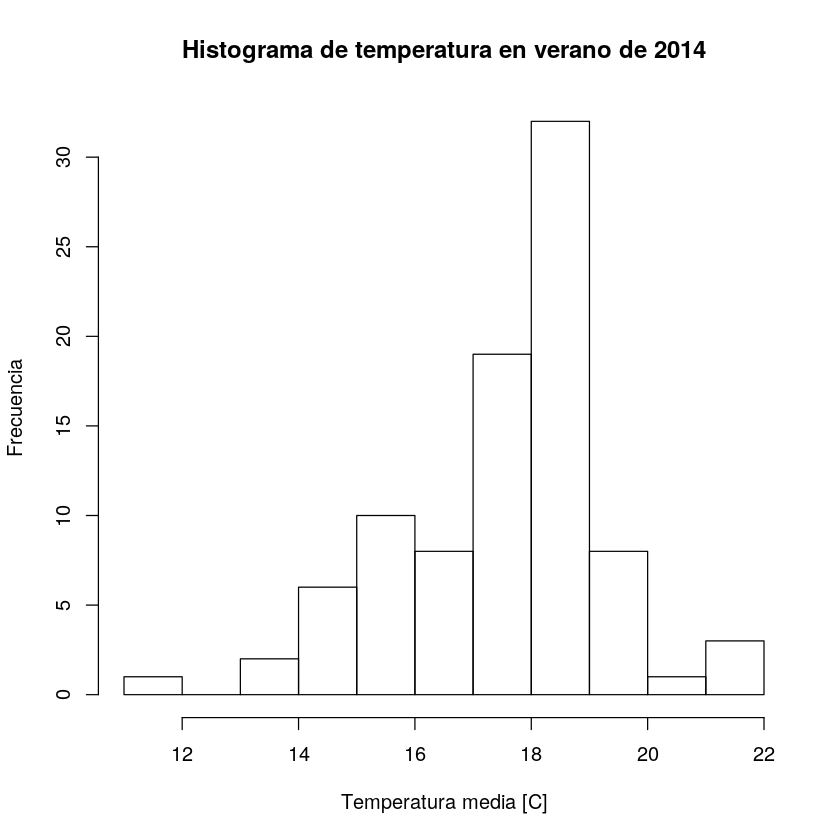

In [63]:
# Pinto los datos de temperatura de verano 2014
vector.2014 <- my.data.2014$AVG.Temp.

hist(vector.2014,
    xlab = "Temperatura media [C]",
    ylab = "Frecuencia",
    main = "Histograma de temperatura en verano de 2014")

mean.2014 <- mean(vector.2014)
mean.2014
median.2014 <- median(vector.2014)
median.2014
sd.2014 <- sd(vector.2014)
sd.2014

[1] 18,62012

[1] 18,6691

[1] 1,958855

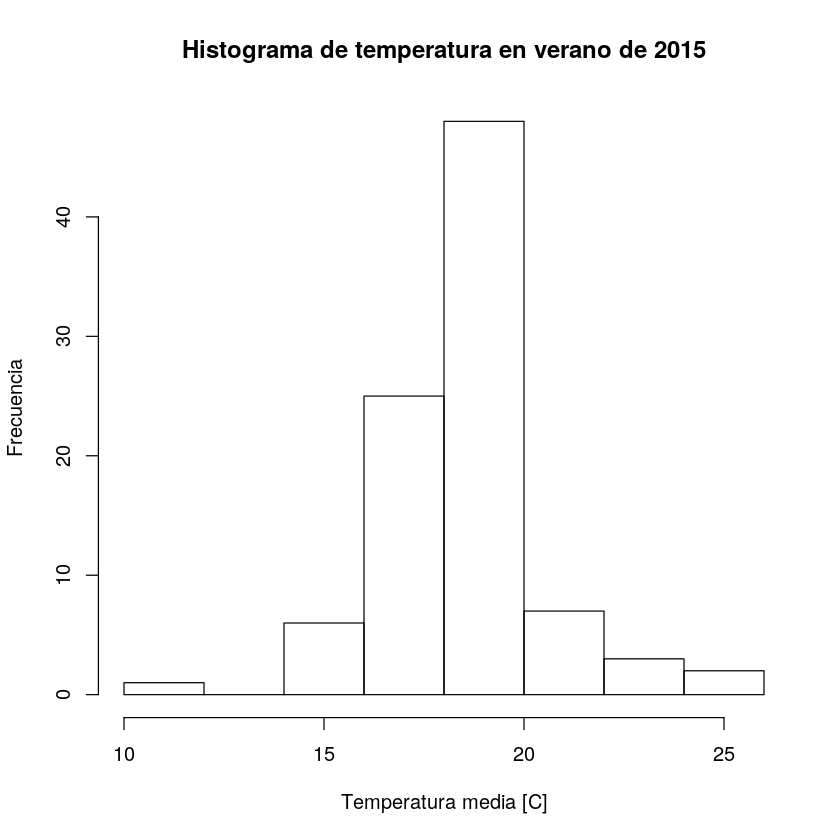

In [64]:
# Pinto los datos de temperatura de verano 2015
vector.2015 <- my.data.2015$AVG.Temp.

hist(vector.2015,
    xlab = "Temperatura media [C]",
    ylab = "Frecuencia",
    main = "Histograma de temperatura en verano de 2015")

mean.2015 <- mean(vector.2015)
mean.2015
median.2015 <- median(vector.2015)
median.2015
sd.2015 <- sd(vector.2015)
sd.2015

In [65]:
# Pongo los datos en una tabla
my.table <- matrix(c(mean.2014, median.2014, sd.2014,
                    mean.2015, median.2015, sd.2015),ncol = 3, nrow = 2, byrow = T)
colnames(my.table)<-c("media", "mediana", "desviacion tipica")
rownames(my.table)<-c("2014", "2015")
my.table

media    mediana  desviacion tipica
2014 17,49939 17,96167 1,825952         
2015 18,62012 18,66910 1,958855

### Bootstrap

Tecnica de remuestreo que consiste en generar nuevas pseudomuestras sustituyendo cada uno de los elementos de la muestra original por cualquier otro elemento elegido. Cada una de las nuevas psuedomuestras tiene el mismo número de elementos que la original. No todos los elementos de la muestra original tienen por qué aparecer en una pseudomuestra. Algunos elementos de la muestra orginal pueden aparecer repetidos en una pseudomuestra.

Crea una función que reciba un vector de números ‘x’ (la muestra original) y un número natural N, que genere una matriz que tenga N columnas siendo cada una de estas, una de las muestras de Bootstrap.

In [60]:
# Defino una función que produzca una muestra de bootstrap, dado un vector de números
my.bootstrap <- function(vec.x){
    my.N <- length(vec.x)
    my.sample <- sample(1:my.N,my.N,replace=T)
    return(vec.x[my.sample])
}

# Defino una función que, dado un vector de numeros y un numero natural N, 
#produzca una matriz con N muestras de bootstrap
my.bootstrap.generator <- function(my.x, n.samples){
    my.bootstrap.matrix <- matrix(, nrow = length(my.x), ncol = 0)
    for(i in 1:n.samples){
        my.bootstrap.matrix <- cbind(my.bootstrap.matrix, my.bootstrap(my.x))
    }
    return(my.bootstrap.matrix)
}

Calcular (para N=1000):

■ La media y la desviación estándar de la media y compararlas con la obtenida anteriormente.

In [99]:
# Indico cuantas muestras quiero
N = 1000

In [120]:
# EMPIEZO POR 2014

# Produzco las muestras de bootstrap
bootstrap.matrix.2014 <- my.bootstrap.generator(vector.2014, N)

# Calculo los estadisticos
mean.bootstrap.2014 <- mean(apply(bootstrap.matrix.2014, FUN = mean, MARGIN = 2))
mean.bootstrap.2014

sd.bootstrap.2014 <- sqrt(1/(N-1)*sum((apply(bootstrap.matrix.2014, FUN = mean, MARGIN = 2) - mean.2014)^2))
sd.bootstrap.2014

[1] 17,49983

[1] 0,1892079

In [121]:
# HAGO LO MISMO PARA 2015

# Produzco las muestras de bootstrap
bootstrap.matrix.2015 <- my.bootstrap.generator(vector.2015, N)

# Calculo los estadisticos
mean.bootstrap.2015 <- mean(apply(bootstrap.matrix.2015, FUN = mean, MARGIN = 2))
mean.bootstrap.2015

sd.bootstrap.2015 <- sqrt(1/(N-1)*sum((apply(bootstrap.matrix.2015, FUN = mean, MARGIN = 2) - mean.2015)^2))
sd.bootstrap.2015

[1] 18,62044

[1] 0,2024104

In [128]:
# Pongo los datos en una tabla
my.bootstrap.table <- matrix(c(mean.bootstrap.2014, sd.bootstrap.2014, sd.2014,
                    mean.bootstrap.2015, sd.bootstrap.2015, sd.2015),ncol = 3, nrow = 2, byrow = T)
colnames(my.bootstrap.table)<-c("media", "desviacion tipica bootstrap", "desviacion tipica original")
rownames(my.bootstrap.table)<-c("2014", "2015")
my.bootstrap.table

media    desviacion tipica bootstrap desviacion tipica original
2014 17,49983 0,1892079                   1,825952                  
2015 18,62044 0,2024104                   1,958855

### Jacknife
Tecnica de remuestreo que consiste en generar pseudomuestras de modo que cada vez se quita un elemento de la muestra original. Las muestras por tanto tendras tamaño de N-1.

Crea una función que reciba un vector de números 'x' (la muestra original) y genere una matriz que contenga todas las muestras posibles de jacknife de la muestra original.

In [77]:
# Defino una función que produzca una matriz 
# con todas las muestras de jackknife de un vector de números
my.jackknife.generator <- function(my.x){
    my.jackknife.length <- length(my.x) - 1
    my.jackknife.matrix <- matrix(, nrow = my.jackknife.length, ncol = 0)
    for(i in 1:my.jackknife.length){
        if (i %% 100 == 0) print(i) 
        my.jackknife.matrix <- cbind(my.jackknife.matrix, my.x[-i])
    }
    return(my.jackknife.matrix)
}

Calcula:

■ La media y la desviación estándar de la media y compararlas con la obtenida anteriormente.

In [122]:
# EMPIEZO POR 2014

# defino el numero de muestras de jackknife que puedo producir
M = length(vector.2014)

# Produzco las muestras de jackknife
jackknife.matrix.2014 <- my.jackknife.generator(vector.2014)

# Calculo los estadisticos
mean.jackknife.2014 <- mean(apply(jackknife.matrix.2014, FUN = mean, MARGIN = 2))
mean.jackknife.2014

sd.jackknife.2014 <- sqrt(M/(M-1)*sum((apply(jackknife.matrix.2014, FUN = mean, MARGIN = 2) - mean.2014)^2))
sd.jackknife.2014

[1] 17,49925

[1] 0,1942439

In [123]:
# HAGO LO MISMO PARA 2015

# defino el numero de muestras de jackknife que puedo producir
M = length(vector.2015)

# Produzco las muestras de jackknife
jackknife.matrix.2015 <- my.jackknife.generator(vector.2015)

# Calculo los estadisticos
mean.jackknife.2015 <- mean(apply(jackknife.matrix.2015, FUN = mean, MARGIN = 2))
mean.jackknife.2015

sd.jackknife.2015 <- sqrt(M/(M-1)*sum((apply(jackknife.matrix.2015, FUN = mean, MARGIN = 2) - mean.2015)^2))
sd.jackknife.2015

[1] 18,61972

[1] 0,2032356

In [126]:
# Pongo los datos en una tabla
my.jackknife.table <- matrix(c(mean.jackknife.2014, sd.jackknife.2014, sd.2014,
                    mean.jackknife.2015, sd.jackknife.2015, sd.2015),ncol = 3, nrow = 2, byrow = T)
colnames(my.jackknife.table)<-c("media", "desviacion tipica jacknife", "desviacion tipica original")
rownames(my.jackknife.table)<-c("2014", "2015")
my.jackknife.table

media    desviacion tipica jacknife desviacion tipica original
2014 17,49925 0,1942439                  1,825952                  
2015 18,61972 0,2032356                  1,958855

### Interpretación de los resultados

Los valores de las media obtenidos directamente de la muestra original y los obtenido con la tecnica bootstrap y jackknife son muy parecidos, ya que estamos produciendo más muestras con los mismos valores que la muestra original.

Por otro lado, el aspecto más interesante de las técnicas de remuestreo es la posibilidad de aumentar artificialmente la dimensionalidad del dataset que estamos estudiando.

Este hecho se puede utilizar para reducir la incertidumbre sobre los parametros estadisticos del dataset, en nuestro caso sobre la media de las temperaturas medidas.

Más en concreto, la incertidumbre que podemos asociar a la media muestral de las temperaturas es, en principio, la desviación típica de la distribución.

Gracias a las técnicas de remuestreo, podemos producir nuevas muestras con la misma p.d.f.: calculando la media muestral de cada una de ellas y luego la desviación típica de las media muestrales, logramos obtener una incertidumbre más pequeña.

En el caso de una p.d.f. gaussiana, ya sabemos que esta incertidumbre va como $\sigma_{media-muestral}$ = $\frac{\sigma}{\sqrt{M}}$, donde M el número de observaciones de la muestra original, y es lo que obtenemos en el ejemplo de esta práctica.

Aún más interesante sería el caso de una p.d.f. desconocida, donde el comportamiento de la media muestral se podría conocer de antemano.